In [1]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys
import os
from statsmodels.tsa.stattools import grangercausalitytests
from scipy import stats

In [2]:
dataDirectory = "../Datasets/ESI_Large.csv" #LOAD ESI DATA
rawData = pd.read_csv(dataDirectory, header=0, nrows=None)

In [3]:
dataESInoNANs = rawData.dropna(axis=1) #DROP ANY ROWS CONTAINING MISSING VALUES
dataESInoNANs

,Month-Year,EU.INDU,EU.SERV,EU.CONS,EU.RETA,EU.BUIL,EU.ESI,EU.EEI,EA.INDU,EA.SERV,...,FI.BUIL,FI.ESI,FI.EEI,SE.INDU,SE.SERV,SE.CONS,SE.RETA,SE.BUIL,SE.ESI,SE.EEI
0,Jan-05,-4.4,10.3,-10.0,-8.3,-10.8,100.4,97.0,-4.1,9.6,...,-13.3,105.1,99.7,-0.4,31.7,2.0,5.7,6.2,103.6,94.4
1,Feb-05,-4.9,8.1,-9.9,-9.5,-11.0,99.4,96.0,-5.0,6.8,...,-10.7,103.9,105.1,-2.3,29.8,1.5,13.3,-0.9,101.9,92.2
2,Mar-05,-6.3,8.5,-10.1,-9.4,-10.5,98.4,97.3,-6.8,7.2,...,1.3,103.8,100.1,-6.8,30.1,1.9,7.7,-2.9,100.3,95.2
3,Apr-05,-7.7,9.9,-10.8,-8.2,-8.7,98.1,97.2,-8.0,8.7,...,7.2,102.6,104.1,-11.0,32.8,-1.0,4.7,5.7,98.1,94.1
4,May-05,-7.8,10.3,-12.1,-9.6,-9.2,97.3,95.7,-8.7,9.4,...,3.7,102.9,99.5,-8.9,25.8,-0.4,2.4,5.6,97.9,93.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,Oct-22,-1.6,4.1,-28.8,-6.0,0.3,92.8,104.7,-0.6,3.3,...,-10.4,85.2,100.6,8.3,7.5,-27.5,-17.7,3.1,83.9,104.9
214,Nov-22,-2.1,4.3,-25.1,-5.8,0.1,94.1,106.1,-1.3,4.0,...,-14.4,83.7,99.9,9.5,4.4,-23.3,-13.9,0.1,86.1,102.8
215,Dec-22,-1.5,6.7,-23.5,-3.6,0.7,95.6,106.1,-0.6,7.5,...,-17.1,82.5,97.4,7.6,4.4,-24.1,-15.7,-3.2,84.0,102.4
216,Jan-23,-0.1,8.2,-22.1,-1.6,-1.5,97.8,108.1,1.2,10.4,...,-24.0,87.2,97.8,4.6,2.5,-23.3,-14.8,-8.8,83.1,100.5


In [4]:
dataESI = dataESInoNANs.copy()

c = 0
for col in dataESInoNANs: #DROP DATA THAT IS NOT THE COUNTRY'S RAW ESI SCORE
    if ".ESI" not in col and c != 0:
        dataESI.drop(col, axis=1, inplace=True)
    c = 1

dataESI.reset_index(inplace=True, drop=True)
dataESI.T.to_csv("../Datasets/ESI_Clean.csv")

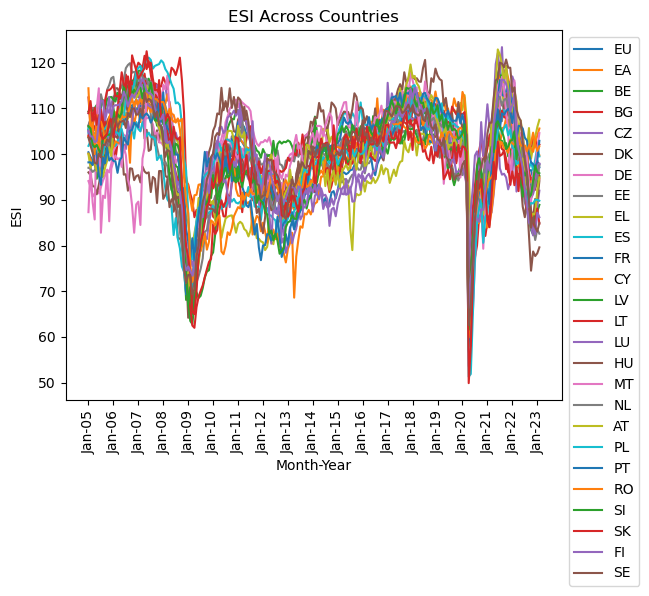

In [5]:
transformedDataESI = dataESI.T

conts = []
for col in dataESI: #GET THE COUNTRY NAMES FOR THE LEGEND
    if col != "Month-Year":
        conts.append(col[0:2])

for i in range(1,27):
    plt.plot(transformedDataESI.iloc[0],transformedDataESI.iloc[i])
plt.legend(conts, bbox_to_anchor=(1,1))
plt.xticks(rotation="vertical")
plt.xticks(transformedDataESI.iloc[0][::12])
plt.xlabel("Month-Year")
plt.ylabel("ESI")
plt.title("ESI Across Countries")
plt.show()

The two notable breakpoints are around 2008 and 2020. These correlate respectively with the 2008 Housing Crisis and the COVID-19 Pandemic

In [6]:
dataDirectory = "../Datasets/cleaned_Productivity.csv" #GET THE PRODUCTIVITY DATA TO LOOK FOR CORRELATION
prodData = pd.read_csv(dataDirectory, header=0, nrows=None)
prodData

,LOCATION,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,mean
0,AUS,43.813437,45.338482,46.025462,47.089456,46.931496,47.099677,47.342066,47.873036,49.523676,...,52.558753,52.780926,54.099648,53.945416,54.561035,54.559641,55.212012,56.214321,56.820351,50.587459
1,AUT,55.825179,56.533555,57.591558,58.071618,59.181589,60.632340,62.218785,63.814049,63.814456,...,66.080679,66.327394,67.267651,67.184974,67.999464,68.309455,68.309868,69.970148,69.634603,63.955261
2,BEL,63.089170,63.233672,63.667303,64.204011,66.278551,67.287921,67.637137,68.887444,68.464336,...,69.517696,70.513657,71.604653,71.674769,71.534022,71.681631,72.259271,74.541737,73.607184,68.830169
3,BGR,14.861829,15.438275,16.313284,16.783858,17.182034,17.965425,18.618248,19.229785,19.475667,...,22.460713,22.607390,23.296069,23.897609,24.130056,24.784139,25.687153,25.775778,26.559335,20.905039
4,CAN,44.249048,44.960465,45.686833,45.787448,46.167149,47.187987,47.742663,47.802103,47.658733,...,50.068609,51.425818,51.340885,51.524774,52.346352,52.543577,52.996192,56.971404,53.969872,49.328641
5,CHE,61.437020,62.847795,63.171539,62.871440,63.236690,64.693828,66.315161,67.595243,68.253612,...,69.759903,70.447419,69.982344,70.431631,71.561236,73.212853,73.619376,74.655861,75.909195,68.275833
6,CHL,17.914007,18.467892,18.642397,18.913712,19.666660,20.756781,21.576242,22.452244,22.983801,...,23.997201,24.412230,24.525405,24.869271,24.794088,25.319539,25.304435,28.606966,28.986876,22.887997
7,COL,9.652419,9.690187,9.482174,9.500538,10.052163,10.232035,10.890402,11.347122,11.360227,...,12.052849,12.371221,12.488134,12.724875,12.862658,13.050577,13.461440,16.115907,14.335103,11.680666
8,CRI,13.419427,13.340478,13.431107,13.620390,13.961451,13.718511,14.259665,14.453706,14.909054,...,18.620355,19.093774,19.707747,20.571849,21.056646,21.446167,22.038536,25.395334,24.023111,17.507325
9,CZE,25.998047,27.994158,28.429678,29.901424,31.147574,32.765277,34.781571,36.256014,36.139167,...,37.004724,37.432375,39.390083,39.251558,40.595969,41.161265,42.272668,43.289836,43.487932,36.016020


In [7]:
# MATCHING DATA ANALYSIS FOR CORRELATION
matchProd = prodData.copy()
matchProd.drop(columns=matchProd.columns[1:6], inplace=True) #DROP DATA PRE-2005
matchProd.drop(columns=matchProd.columns[-1], inplace=True) #DROP MEAN VALUES
matchProd.drop(1, inplace=True) #DROP COUNTRIES THAT DON'T MATCH THE OTHER DATASET
matchProd.drop(4, inplace=True)
matchProd.drop(5, inplace=True)
matchProd.drop(6, inplace=True)
matchProd.drop(7, inplace=True)
matchProd.drop(8, inplace=True)
matchProd.drop(16, inplace=True)
matchProd.drop(17, inplace=True)
matchProd.drop(18, inplace=True)
matchProd.drop(20, inplace=True)
matchProd.drop(21, inplace=True)
matchProd.drop(22, inplace=True)
matchProd.drop(23, inplace=True)
matchProd.drop(24, inplace=True)
matchProd.drop(25, inplace=True)
matchProd.drop(29, inplace=True)
matchProd.drop(31, inplace=True)
matchProd.drop(32, inplace=True)
matchProd.drop(36, inplace=True)
matchProd.drop(40, inplace=True)
matchProd.drop(41, inplace=True)
matchProd.drop(42, inplace=True)
matchProd.reset_index(inplace=True, drop=True)
matchProd

,LOCATION,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,AUS,47.099677,47.342066,47.873036,49.523676,49.111719,49.886548,50.465688,51.671243,52.558753,52.780926,54.099648,53.945416,54.561035,54.559641,55.212012,56.214321,56.820351
1,BEL,67.287921,67.637137,68.887444,68.464336,68.020751,69.053627,68.581978,68.923207,69.517696,70.513657,71.604653,71.674769,71.534022,71.681631,72.259271,74.541737,73.607184
2,BGR,17.965425,18.618248,19.229785,19.475667,19.717737,20.847786,21.781488,22.497211,22.460713,22.607390,23.296069,23.897609,24.130056,24.784139,25.687153,25.775778,26.559335
3,CZE,32.765277,34.781571,36.256014,36.139167,35.303035,36.128328,36.734795,36.886973,37.004724,37.432375,39.390083,39.251558,40.595969,41.161265,42.272668,43.289836,43.487932
4,DEU,59.900695,60.858653,61.577685,61.593702,59.739676,61.116778,62.706421,63.093299,63.392823,64.049842,64.376152,65.248665,66.411797,66.549287,67.055996,67.714113,68.303361
5,DNK,64.048343,64.892447,65.012119,64.044269,63.453957,65.937261,66.165566,67.430176,67.960405,69.036988,70.022816,70.856515,72.180878,73.769587,74.317394,75.083567,75.831338
6,ESP,45.562108,45.828539,46.335067,46.454358,47.573943,48.783311,49.503478,50.458453,51.203041,51.361566,51.769513,52.006193,52.460584,52.340690,52.631029,52.648278,51.829924
7,EST,28.372540,29.802344,32.051758,30.939920,31.588678,33.280600,32.733169,33.822894,34.255974,35.138109,34.947358,35.864899,36.927656,39.328419,40.593175,42.940260,42.911145
8,FIN,56.779062,58.155532,60.024417,59.322583,56.695101,58.669818,59.482446,58.526417,58.741949,58.857955,59.336748,60.730655,62.263776,61.531074,61.480236,61.675189,61.887283
9,FRA,61.487911,63.018745,62.723395,62.323215,61.685771,62.484285,63.109941,63.316137,64.173601,64.791079,65.316731,65.499243,66.881126,67.155153,67.417144,67.757324,66.745494


In [8]:
dataESI = dataESI.iloc[0:204] #REMOVES DATA POST 2021 TO ALIGN WITH OTHER DATASET

In [9]:
matchESI = dataESI.T.copy()
matchESI.drop("EU.ESI", inplace=True) #DROP COUNTRIES TO MATCH OTHER DATASET
matchESI.drop("EA.ESI", inplace=True)
matchESI.drop("CY.ESI", inplace=True)
matchESI.drop("EL.ESI", inplace=True)
matchESI.drop("MT.ESI", inplace=True)
matchESI.sort_index(inplace=True)
idx = [14] + [i for i in range(len(matchESI)) if i != 14] #REORDERING AFTER ALPHABETICAL SORTING TO MATCH OTHER DATASET
matchESI = matchESI.iloc[idx]
temp = matchESI.copy()
temp.iloc[19] = matchESI.iloc[21]
temp.iloc[21] = matchESI.iloc[19]
matchESI = temp
matchESI

,0,1,2,3,4,5,6,7,8,9,...,194,195,196,197,198,199,200,201,202,203
Month-Year,Jan-05,Feb-05,Mar-05,Apr-05,May-05,Jun-05,Jul-05,Aug-05,Sep-05,Oct-05,...,Mar-21,Apr-21,May-21,Jun-21,Jul-21,Aug-21,Sep-21,Oct-21,Nov-21,Dec-21
AT.ESI,100.0,97.0,98.5,98.1,96.3,97.1,94.8,95.1,97.0,98.6,...,107.0,107.7,115.1,122.9,121.7,119.6,115.7,119.3,114.8,110.1
BE.ESI,105.3,104.4,102.6,98.1,94.6,97.0,94.8,96.9,99.9,104.2,...,106.8,109.8,111.9,117.6,119.0,114.8,111.7,112.1,114.6,111.0
BG.ESI,112.4,106.2,106.3,108.1,108.7,112.4,109.9,101.7,107.3,103.4,...,93.4,93.6,95.7,99.5,102.6,101.1,100.8,99.0,96.0,100.6
CZ.ESI,108.9,108.6,105.4,105.2,108.0,105.9,110.2,106.9,109.1,110.0,...,87.2,91.2,96.0,104.8,96.9,95.5,95.7,94.9,92.3,94.0
DE.ESI,94.1,92.9,90.7,91.4,92.1,91.4,92.8,94.2,95.3,96.6,...,105.1,104.7,108.2,114.9,116.3,116.4,117.5,116.7,114.6,111.7
DK.ESI,106.3,107.6,106.0,97.6,100.9,100.2,96.9,106.7,102.6,107.2,...,102.5,106.9,112.0,114.1,115.6,113.1,116.3,119.1,113.1,112.0
EE.ESI,105.8,107.7,110.1,110.1,110.7,110.3,113.1,111.2,109.8,114.1,...,99.4,101.3,104.5,105.3,110.1,107.2,111.5,107.4,107.4,107.5
ES.ESI,105.6,103.6,104.3,104.6,104.4,103.7,104.9,105.3,105.6,106.3,...,100.5,102.6,104.9,106.5,109.8,108.0,109.2,111.7,109.0,108.1
FI.ESI,105.1,103.9,103.8,102.6,102.9,106.8,111.7,111.7,107.4,109.4,...,99.5,106.7,109.7,113.3,113.7,116.3,116.2,115.3,113.6,109.3


In [10]:
# NOW BOTH DATASETS HAVE SAME COUNTRIES AND SAME TIMEFRAME BUT NOT SAME TIMESTEP
yearlyData = []

for i in range(0,22):
    yearlyData.append(matchESI.iloc[i][::12])
    
yearESI = pd.DataFrame(yearlyData)
yearESI.drop(columns=192, inplace=True)
yearESI

,0,12,24,36,48,60,72,84,96,108,120,132,144,156,168,180
Month-Year,Jan-05,Jan-06,Jan-07,Jan-08,Jan-09,Jan-10,Jan-11,Jan-12,Jan-13,Jan-14,Jan-15,Jan-16,Jan-17,Jan-18,Jan-19,Jan-20
AT.ESI,100.0,106.0,113.0,102.0,74.1,93.5,106.2,95.1,92.6,96.9,96.0,102.7,108.4,116.7,106.9,104.4
BE.ESI,105.3,107.5,112.5,104.6,71.4,96.1,109.6,91.7,91.2,103.5,97.1,100.7,106.7,107.9,99.6,99.9
BG.ESI,112.4,105.1,120.0,116.8,93.4,86.3,94.2,92.2,89.0,94.3,96.5,100.9,105.3,110.1,103.8,103.1
CZ.ESI,108.9,112.6,115.4,114.4,78.0,89.2,100.5,89.2,87.6,93.9,103.4,105.8,107.0,107.6,107.3,101.7
DE.ESI,94.1,100.6,106.4,101.9,74.2,93.5,110.2,102.6,99.0,105.7,103.1,104.7,108.0,114.3,107.9,103.2
DK.ESI,106.3,111.2,115.6,103.5,64.2,105.1,107.5,90.2,91.9,106.9,97.4,102.9,106.8,109.1,104.2,100.3
EE.ESI,105.8,116.9,116.5,97.7,69.7,88.5,104.7,97.8,98.6,101.2,96.8,98.3,102.2,106.1,101.0,95.4
ES.ESI,105.6,101.8,105.5,96.1,72.0,88.7,89.2,89.9,85.9,97.4,104.6,107.2,107.5,111.8,104.6,101.8
FI.ESI,105.1,110.5,114.3,108.7,75.4,100.2,109.6,93.8,91.7,91.6,89.2,95.3,104.6,112.1,103.7,96.8


In [11]:
conts = []
for col in yearESI.T: #GET THE COUNTRY NAMES FOR THE LEGEND
    if col != "Month-Year":
        conts.append(col[0:2])

In [12]:
countryCorrelationPROD_ESI = []
countryCorrelationValues = []

for i in range(0,21):
    data = pd.DataFrame([matchProd.loc[i][1:-1].to_list(),yearESI.iloc[i+1].to_list()])
    countryCorrelationPROD_ESI.append(f"Country {i+1}: " + str(stats.pearsonr(data.iloc[0], data.iloc[1])))
    countryCorrelationValues.append(stats.pearsonr(data.iloc[0], data.iloc[1])[0])
    
countryCorrelationPROD_ESI
countryCorrelationValues

countryCorrData = pd.DataFrame(countryCorrelationValues,conts)
countryCorrData.columns = ["Correlation"]
countryCorrData

,Correlation
AT,0.212272
BE,0.091110
BG,-0.225558
CZ,0.135978
DE,0.652227
DK,0.193151
EE,-0.148042
ES,0.342692
FI,0.375465
FR,0.289960
